In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from analyze_feature import analyze_feature

In [2]:
# Setting the style for the plots
sns.set_style("white", {'axes.grid' : False})

In [3]:
# Directory where the plots and PDF file will be saved
save_dir_path = 'output'

In [4]:
# Creating a random DataFrame

num_rows = 50

df = pd.DataFrame({
    'patient_id': np.random.randint(0, 9999, size=num_rows).astype(str),
    'feature_1': np.random.randint(0, 1001, size=num_rows),
    'feature_2': np.random.randint(0, 1001, size=num_rows),
    'response': np.random.randint(0, 2, size=num_rows),
    'os_months': np.random.uniform(0, 100, size=num_rows),
    'os_event': np.random.randint(0, 2, size=num_rows),
    'pfs_months': np.random.uniform(0, 100, size=num_rows),
    'pfs_event': np.random.randint(0, 2, size=num_rows)
})

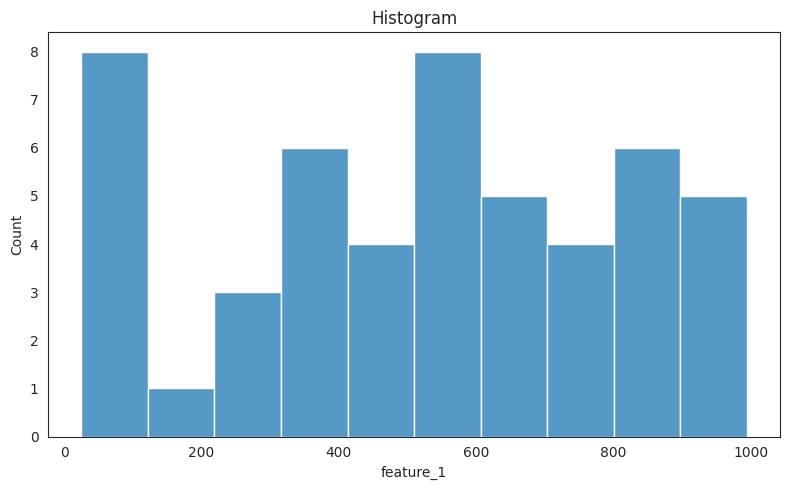

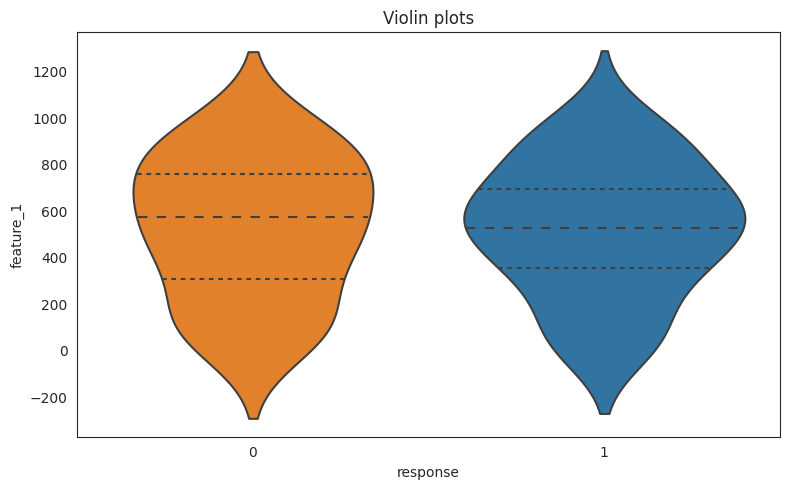

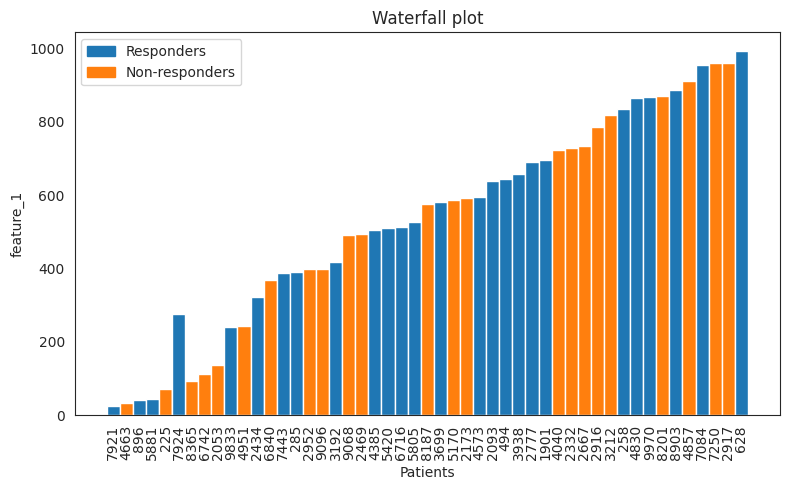

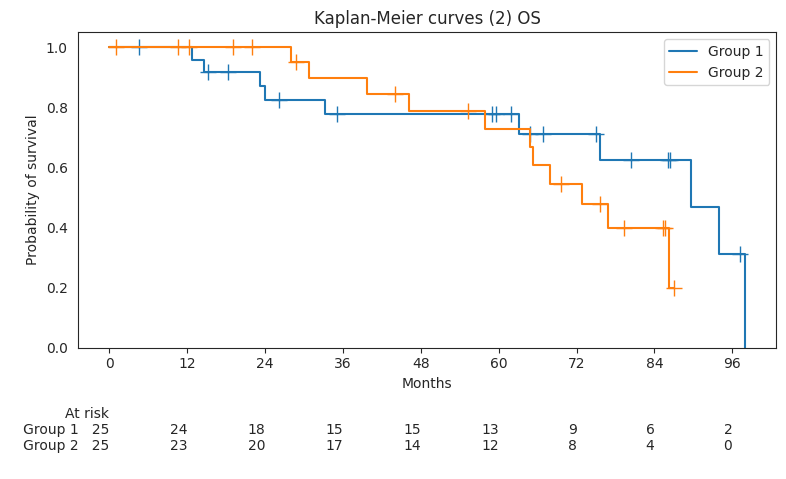

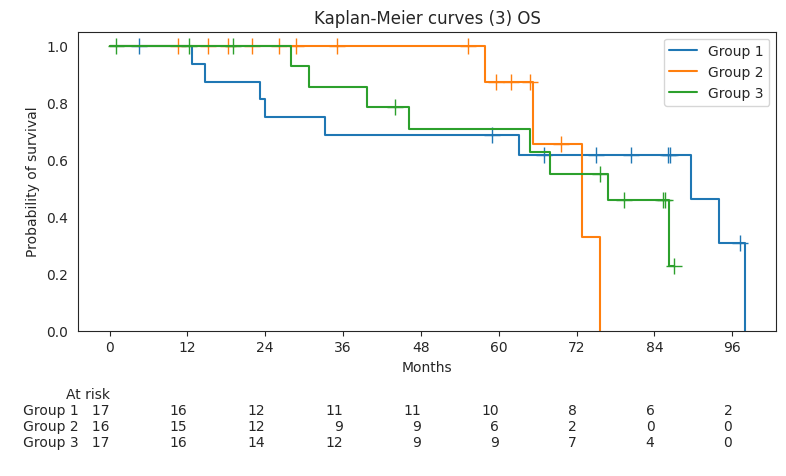

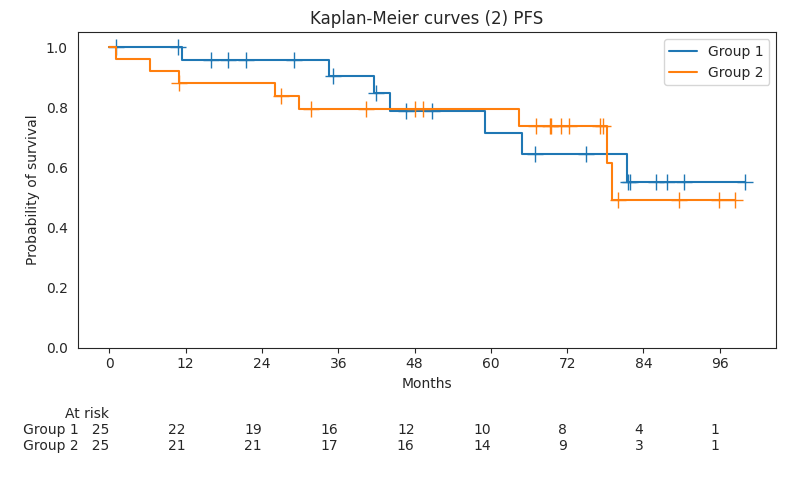

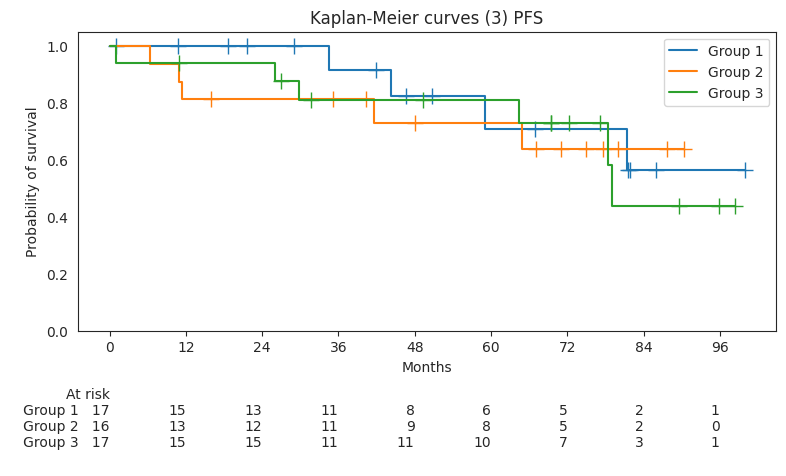

{'Mann-Whitney p-value': 0.9224673551405552, 'Logrank OS p-value': 0.2903324334597038, 'Logrank PFS p-value': 0.7672028136256706, 'Cox OS p-value': 0.4638290163064055, 'Cox OS HR': 1.0005533274663725, 'Cox OS assumption p-value': 0.0930436113233135, 'Cox PFS p-value': 0.2855668019788207, 'Cox PFS HR': 1.0009815499446613, 'Cox PFS assumption p-value': 0.6267905837064176, 'Cox OS dichotomized p-value': 0.295408538919777, 'Cox OS dichotomized HR': 1.664414323136382, 'Cox OS dichotomized assumption p-value': 0.043655450771941724, 'Cox PFS dichotomized p-value': 0.7674552121151187, 'Cox PFS dichotomized HR': 1.1669704204733475, 'Cox PFS dichotomized assumption p-value': 0.3676131073557334, 'Logistic regression LOOCV AUC': 0.009661835748792275}

 PDF saved in output/feature_1.pdf


In [5]:
analyze_feature(df, 'feature_1', save_dir_path)